Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4650
           1       0.95      0.97      0.96      4330

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



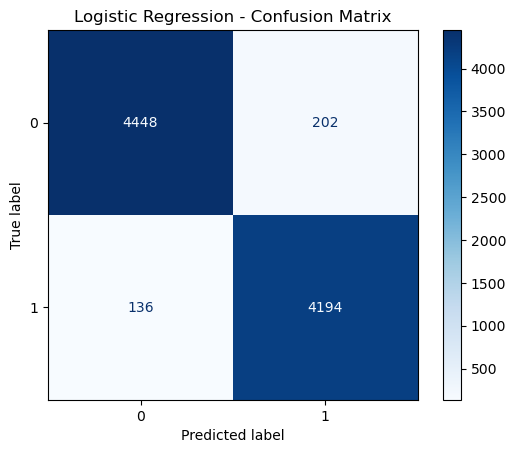

['../models/logistic_regression_model.joblib']

In [7]:
# 1. Imports
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Cleaned Data
df = pd.read_csv("../data/preprocessed/cleaned.csv")  # or use 'combined.csv'
X = df["text"]
y = df["label"]

# 3. Load Pretrained TF-IDF Vectorizer
vectorizer = joblib.load("../models/tfidf_vectorizer.joblib")
X_vectorized = vectorizer.transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# 5. Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# 6. Evaluate Model
y_pred = lr_model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# 8. Save Model
joblib.dump(lr_model, "../models/logistic_regression_model.joblib")